In [ ]:
#Sherif Moataz AbdelSattar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
df = pd.read_csv("/content/Iris.csv")
features=df.drop(columns="Species")
features

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


Inertia is sum of squared distances depending on the number of clusters, this use to conduct the elbow method, which look for an "elbow" point, where the inertia starts to decrease at a slower rate


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


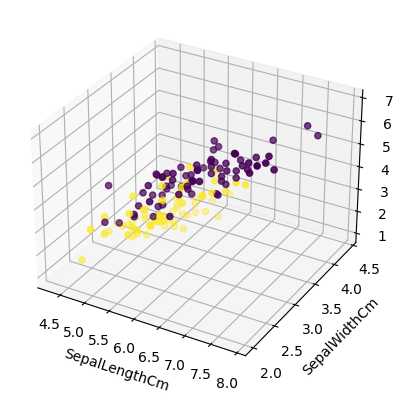

For k=2, Silhouette Score: 0.6205, Calinski-Harabasz Score: 442.8538


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


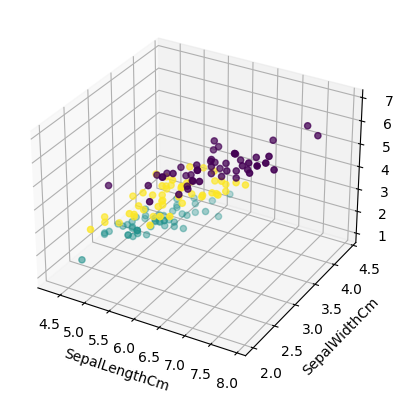

For k=3, Silhouette Score: 0.5822, Calinski-Harabasz Score: 587.9445


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


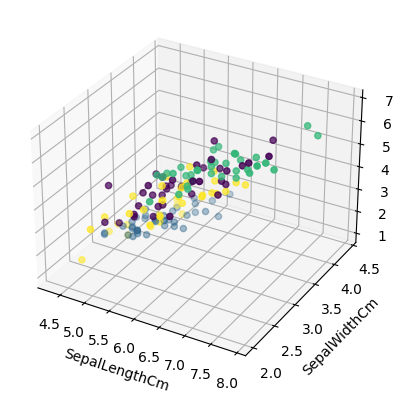

For k=4, Silhouette Score: 0.5565, Calinski-Harabasz Score: 722.2075


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


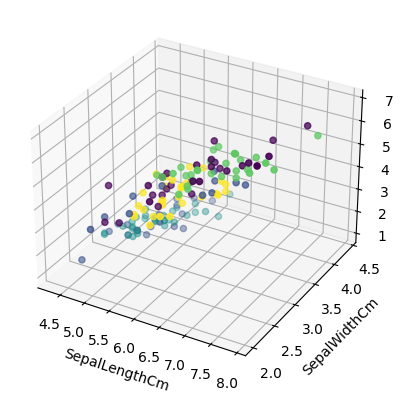

For k=5, Silhouette Score: 0.5408, Calinski-Harabasz Score: 857.0043


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


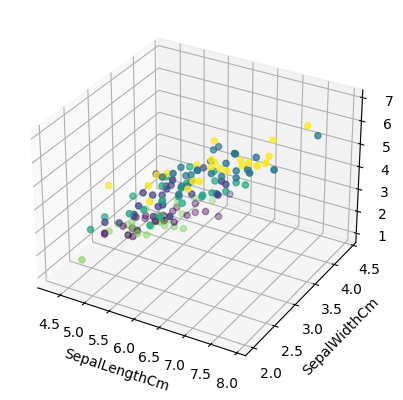

For k=6, Silhouette Score: 0.5334, Calinski-Harabasz Score: 997.2462


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


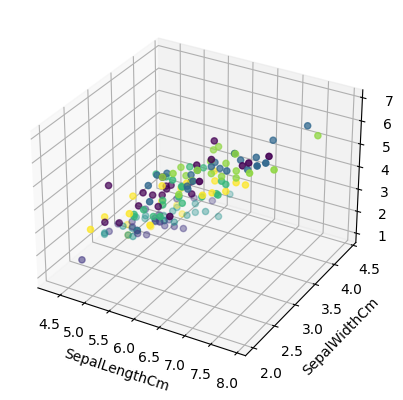

For k=7, Silhouette Score: 0.5191, Calinski-Harabasz Score: 1113.8650


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


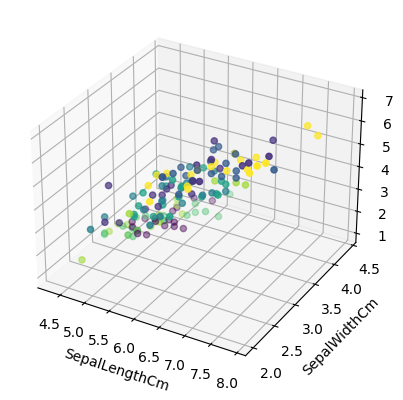

For k=8, Silhouette Score: 0.5095, Calinski-Harabasz Score: 1230.2360


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


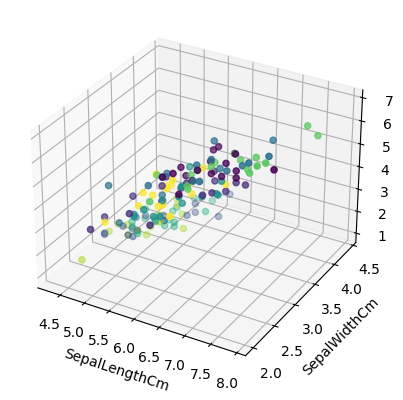

For k=9, Silhouette Score: 0.5083, Calinski-Harabasz Score: 1367.5170


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


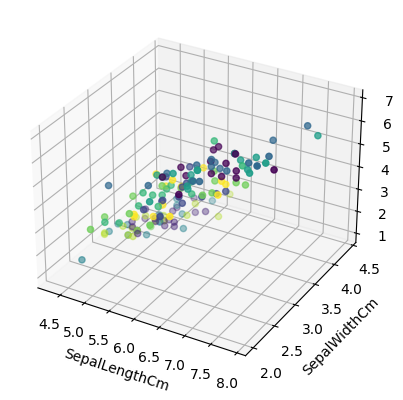

For k=10, Silhouette Score: 0.4992, Calinski-Harabasz Score: 1460.3446


In [ ]:
#inertia is sum of squared distances depending on the number of clusters, this use to conduct the elbow method, which look for an "elbow" point, where the inertia starts to decrease at a slower rate
inertia = []
silhouette_scores=[]
calinski_scores=[]
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(features)

    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(features, labels)
    silhouette_scores.append(silhouette_avg)
    calinski_avg = calinski_harabasz_score(features, labels)
    calinski_scores.append(calinski_avg)


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(features["SepalLengthCm"],features["SepalWidthCm"], features["PetalLengthCm"], c=labels)
    ax.set_xlabel("SepalLengthCm")
    ax.set_ylabel("SepalWidthCm")
    ax.set_zlabel("PetalLengthCm")
    plt.show()

    print(f'For k={k}, Silhouette Score: {silhouette_avg:.4f}, Calinski-Harabasz Score: {calinski_avg:.4f}')



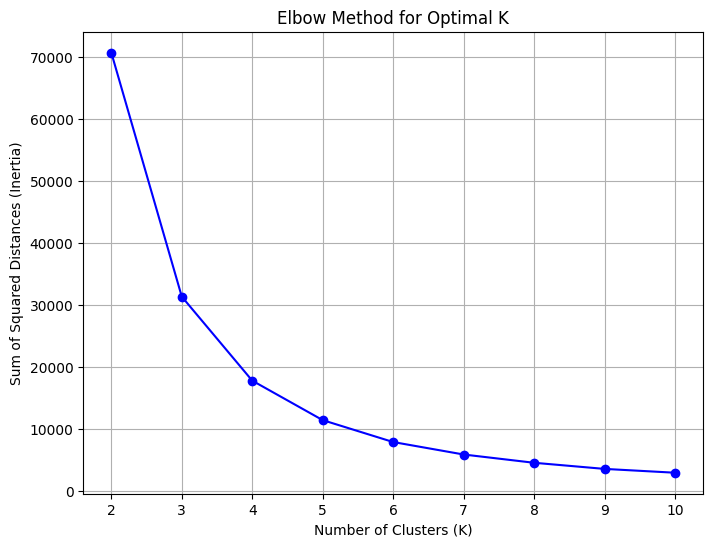

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

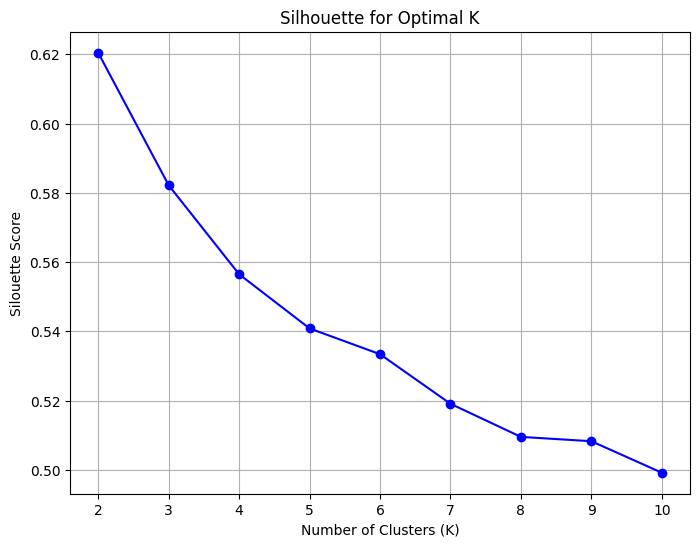

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silouette Score')
plt.title('Silhouette for Optimal K')
plt.grid()
plt.show()

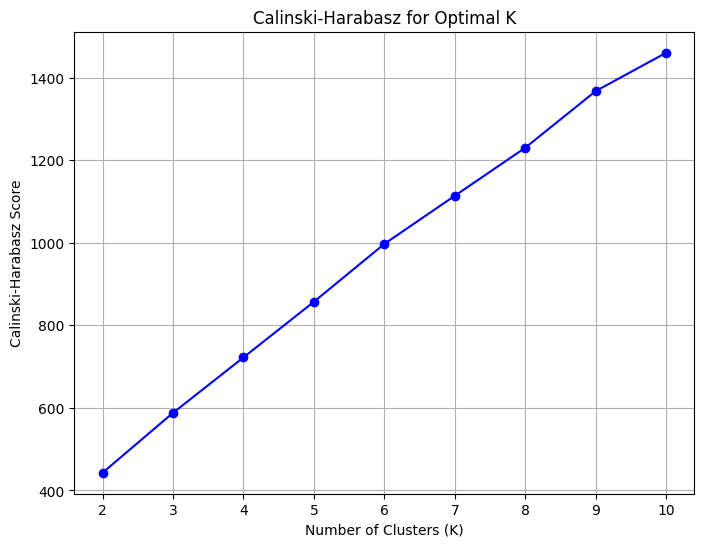

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), calinski_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz for Optimal K')
plt.grid()
plt.show()

The inconclusivity of the Silhouette method and CH method can be attributed to:

 One common reason for a linear increase is that the algorithm is over-splitting the data into very fine-grained clusters, and the index doesn't penalize this behavior strongly enough. In such cases, it ends up with many small, similar clusters.

This intrinsic structure does not naturally lend itself to well-defined clusters. Some datasets are inherently continuous or contain overlapping groups of data points.


Since the elbow point occurs at cluster number 4, 4 clusters is the optimum
This is due the rate of change slowing to almost a constant at this point

